# Localization Health

The question we want to explore is, whether localization health for a map of a given warehouse is predictable based on time of the day and coordinates. The assumption here is that certain region of the warehouse is difficult to localize due to its dynamic nature and this region exhibits periodic pattern of dynamicism.

## Arrow RT

In [1]:
import os
import pandas as pd


RAW_DATA_DIR = '../bags'
PROCESSED_DATA_DIR = '../processed_data'


arrow_rt_df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR,
                                       'arrow-rt.fetchcore-cloud.com',
                                       'localization_score_1_sec_interval.csv'))

# Index each row by timestamp amd drop all the empty data because it's s time series.
# There are plenty "seconds" where data were not recorded.
arrow_rt_df.index = pd.to_datetime(arrow_rt_df['timestamp'])
arrow_rt_df = arrow_rt_df.dropna()
display(arrow_rt_df.head(10))
print('Arrow RT data frame has {} rows'.format(arrow_rt_df.size))

,timestamp,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,,
2020-04-30 23:05:10,2020-04-30 23:05:10,1.0,146.904833,-1.222229,-27.129147,7.408925,254.611274,110.258578,1.0,16.276116,23.0
2020-04-30 23:05:11,2020-04-30 23:05:11,1.0,147.453838,-1.232994,-26.892002,7.734851,255.562652,111.830614,1.0,15.743345,23.0
2020-04-30 23:05:12,2020-04-30 23:05:12,1.0,147.636839,-1.236583,-26.812954,7.843493,255.879778,112.354626,1.0,15.565755,23.0
2020-04-30 23:05:13,2020-04-30 23:05:13,1.0,147.636839,-1.236583,-26.812954,7.843493,255.879778,112.354626,1.0,15.565755,23.0
2020-04-30 23:05:14,2020-04-30 23:05:14,1.0,147.636839,-1.235960,-26.812954,7.843493,255.879778,112.354626,1.0,15.565755,23.0
2020-04-30 23:05:15,2020-04-30 23:05:15,1.0,147.636839,-1.235915,-26.812954,7.843493,255.879778,112.354626,1.0,15.565755,23.0
2020-04-30 23:05:16,2020-04-30 23:05:16,1.0,146.976197,-1.235915,-26.811902,7.844152,254.734941,111.818922,1.0,15.577982,23.0
2020-04-30 23:05:17,2020-04-30 23:05:17,1.0,151.441482,-1.234255,-26.810962,7.838694,262.472904,114.132627,1.0,16.039972,23.0
2020-04-30 23:05:18,2020-04-30 23:05:18,1.0,158.281899,-1.234097,-26.806309,7.836898,274.326769,117.396643,1.0,16.902393,23.0


Data frame has 166496 rows


There are still a lot of rows. It's very hard to plot that many rows. Let's resample it using 1 minute as the frequency.

,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,
2020-04-30 23:05:00,1.0,177.023389,-1.224149,-26.382116,9.901897,306.769360,139.386808,1.0,14.180861,23.0
2020-04-30 23:06:00,1.0,203.988284,-1.233479,-28.136301,11.625602,353.384342,154.613095,1.0,15.995386,23.0
2020-04-30 23:07:00,1.0,195.215328,-1.239591,-31.171515,12.801780,338.421683,151.611852,1.0,14.683020,23.0
2020-04-30 23:08:00,1.0,140.665204,-1.242433,-26.914483,12.743941,243.775326,120.763415,1.0,10.383577,23.0
2020-04-30 23:09:00,1.0,139.550118,-1.219808,-22.063058,11.672281,241.828191,118.346776,1.0,10.855332,23.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-04 20:54:00,1.0,172.074176,-1.228118,-25.917637,15.059201,298.207072,137.626727,1.0,13.263807,20.0
2020-05-04 20:55:00,1.0,125.597563,-1.245857,-26.522364,8.260159,217.806730,94.856329,1.0,15.778249,20.0
2020-05-04 20:58:00,1.0,177.774482,-1.215779,-25.890179,14.432208,307.848850,143.330116,1.0,13.037846,20.0


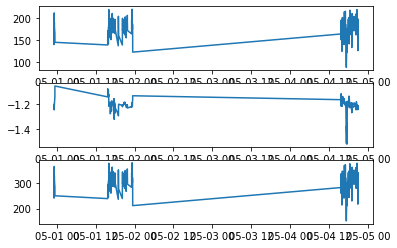

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


df_resampled = arrow_rt_df.resample('60S').mean()
df_resampled = df_resampled.dropna() # Drop all the minutes that don't have data
display(df_resampled)

plt.figure(1)
plt.subplot(311)
plt.plot(df_resampled.index, df_resampled['legacy_localization_score'])
plt.subplot(312)
plt.plot(df_resampled.index, df_resampled['patch_map_score'])
plt.subplot(313)
plt.plot(df_resampled.index, df_resampled['importance'])
plt.show()

Now let's look for mislocalization data and see what is the range of scores that indicate a mislocalization event.

In [3]:
display(arrow_rt_df[arrow_rt_df['localization_valid'] < 1])

,timestamp,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,,


Well there is none... I guess I will need to else where.

## GE Selmer

Carl told me that this instance suffers from localization problem so I am going to dig into their bags and see.

In [8]:
ge_selmer_df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR,
                                       'ge-selmer.fetchcore-cloud.com',
                                       'localization_score_1_sec_interval.csv'))

ge_selmer_df.index = pd.to_datetime(ge_selmer_df['timestamp'])
ge_selmer_df = ge_selmer_df.dropna()
display(ge_selmer_df.head(10))
print('GE Selmer data frame has {} rows'.format(ge_selmer_df.size))

,timestamp,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,,
2020-04-23 20:15:01,2020-04-23 20:15:01,1.0,0.750939,-0.959661,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:02,2020-04-23 20:15:02,1.0,0.750939,-0.959661,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:03,2020-04-23 20:15:03,1.0,0.750939,-0.959661,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:04,2020-04-23 20:15:04,1.0,0.750939,-0.959661,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:05,2020-04-23 20:15:05,1.0,0.750939,-0.959382,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:06,2020-04-23 20:15:06,1.0,0.750939,-0.958964,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:07,2020-04-23 20:15:07,1.0,0.750939,-0.958964,0.890756,-64.172379,1.140504,1.462530,1.0,0.638379,20.0
2020-04-23 20:15:08,2020-04-23 20:15:08,1.0,0.740714,-0.958829,0.930060,-64.185227,1.120172,1.467253,1.0,0.598093,20.0
2020-04-23 20:15:09,2020-04-23 20:15:09,1.0,0.824836,-0.962678,0.943106,-64.185580,1.237274,1.648982,1.0,0.635291,20.0


GE Selmer data frame has 73656 rows


In [9]:
display(ge_selmer_df[ge_selmer_df['localization_valid'] < 1])

,timestamp,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,,


Again, none. I suspect it's because when robot enters mislocalized state, it won't be writing logs to navigate bags. It will be written to else where, maybe downtimebagger?

,localization_valid,legacy_localization_score,patch_map_score,x,y,importance,likelihood,clear,dynamic,hour
timestamp,,,,,,,,,,
2020-04-23 20:15:00,1.0,0.769541,-0.953479,1.460177,-47.784757,1.167408,1.471835,1.0,0.690777,20.0
2020-04-23 20:16:00,1.0,0.862222,-0.916903,-2.610453,-29.679052,1.297401,1.578241,1.0,0.821315,20.0
2020-04-24 11:15:00,1.0,0.714368,-0.934748,0.067747,-38.903436,1.089356,1.344738,1.0,0.702540,11.0
2020-04-24 11:16:00,1.0,0.663527,-0.971780,1.771555,-63.916960,1.018689,1.308480,1.0,0.569001,11.0
2020-04-24 12:08:00,1.0,0.692208,-0.982477,0.968543,-64.171179,1.058713,1.367951,1.0,0.583050,12.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-04 19:44:00,1.0,62.064003,-1.128194,-811.049214,-69.657746,105.295683,105.295683,1.0,1.000000,19.0
2020-05-04 19:45:00,1.0,41.920661,-1.081145,-791.828325,-105.792687,71.106112,71.106112,1.0,1.000000,19.0
2020-05-04 19:46:00,1.0,76.616218,-0.946905,-794.884751,-134.699216,130.035072,130.035072,1.0,1.000000,19.0


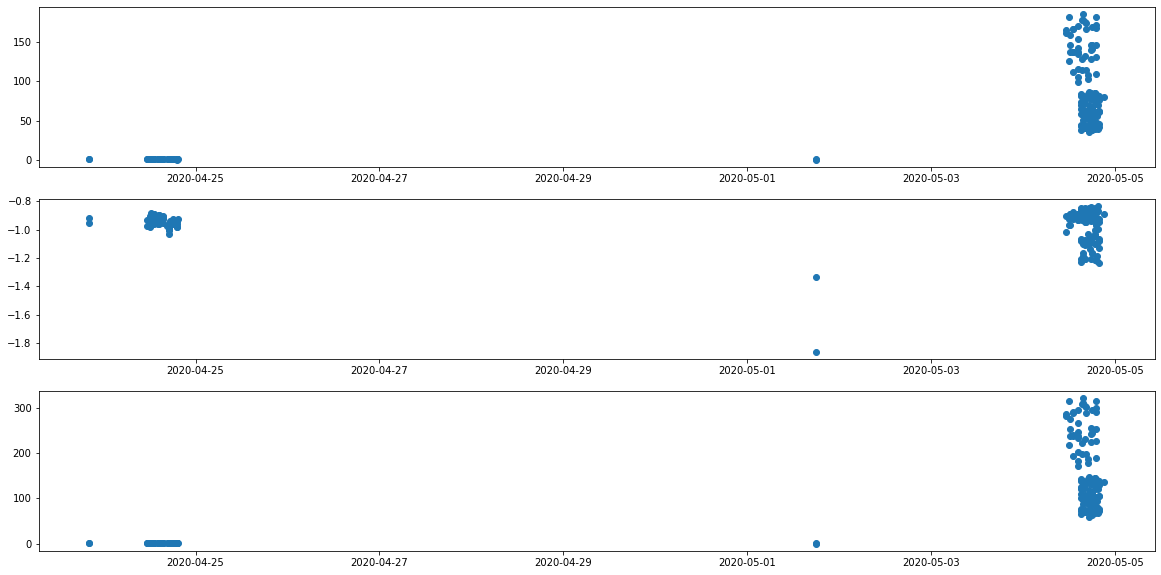

In [14]:
df_resampled = ge_selmer_df.resample('60S').mean()
df_resampled = df_resampled.dropna() # Drop all the minutes that don't have data
display(df_resampled)

plt.figure(1, figsize=(20, 10))
plt.subplot(311)
plt.scatter(df_resampled.index, df_resampled['legacy_localization_score'])
plt.subplot(312)
plt.scatter(df_resampled.index, df_resampled['patch_map_score'])
plt.subplot(313)
plt.scatter(df_resampled.index, df_resampled['importance'])
plt.show()

Okay let's try X,Y coordinate and see if that helps.